 ______________________________________________
 
 #  Spotipy - Visual Analysis
***
 ______________________________________________
 
 ### Utilizing Spotify's API 'spotipy' this notebook will allow for visualization when analyzing artists and tracks  
 
 <br></br>
 <br></br>
 
 **Note:** Before working with this notebook you need to make sure these are true:
 
 - you have registered with Spotify as a developer
 - local conda enviorment has installed each of the required modules

<br></br>

Reference the <a href="https://spotipy.readthedocs.io/en/2.13.0/">spotipy docs</a>, provides a better understanding of the API



Reference <a href="https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-analysis/">Spotify developer</a>, provides a better understanding of the data stucture

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.style as style 

import seaborn as sns

In [2]:
# Public key for the projects spotify developer app
client_id = '5572530ac0664df2b34373f3f41db89b' # May need to insert personal developer key

# Private key for the projects spotify developer app
client_secret = '15734ca0cac44e3c8ee4cc238bc895cf' # May need to insert personal developer key

# A set of strings describing playlist URIs. Playlists are public so no need to aquire authentication 
uri_playlists = ['spotify:playlist:1tdIMWaLOHuzzSOF8DB8Be', # Analogged playlist uri
                 'spotify:playlist:5UYSypfSUpS7a9HOeAJkOf'] # Viscostic playlist uri

In [3]:
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [4]:
playlist_1 = pd.DataFrame(sp.playlist_items(uri_playlists[0]))['items']
playlist_2 = pd.DataFrame(sp.playlist_items(uri_playlists[1]))['items']

In [5]:
play_1 = []
play_2 = []
for song in playlist_1:
    play_1.append(song['track']['uri'])

for song in playlist_2:
    play_2.append(song['track']['uri'])

In [6]:
feat_1 = pd.DataFrame(sp.audio_features(play_1))
feat_2 = pd.DataFrame(sp.audio_features(play_2))

In [7]:
# The reference for this styling:
# https://medium.com/@andykashyap/top-5-tricks-to-make-plots-look-better-9f6e687c1e08
style.use('seaborn-poster')
style.use('ggplot')

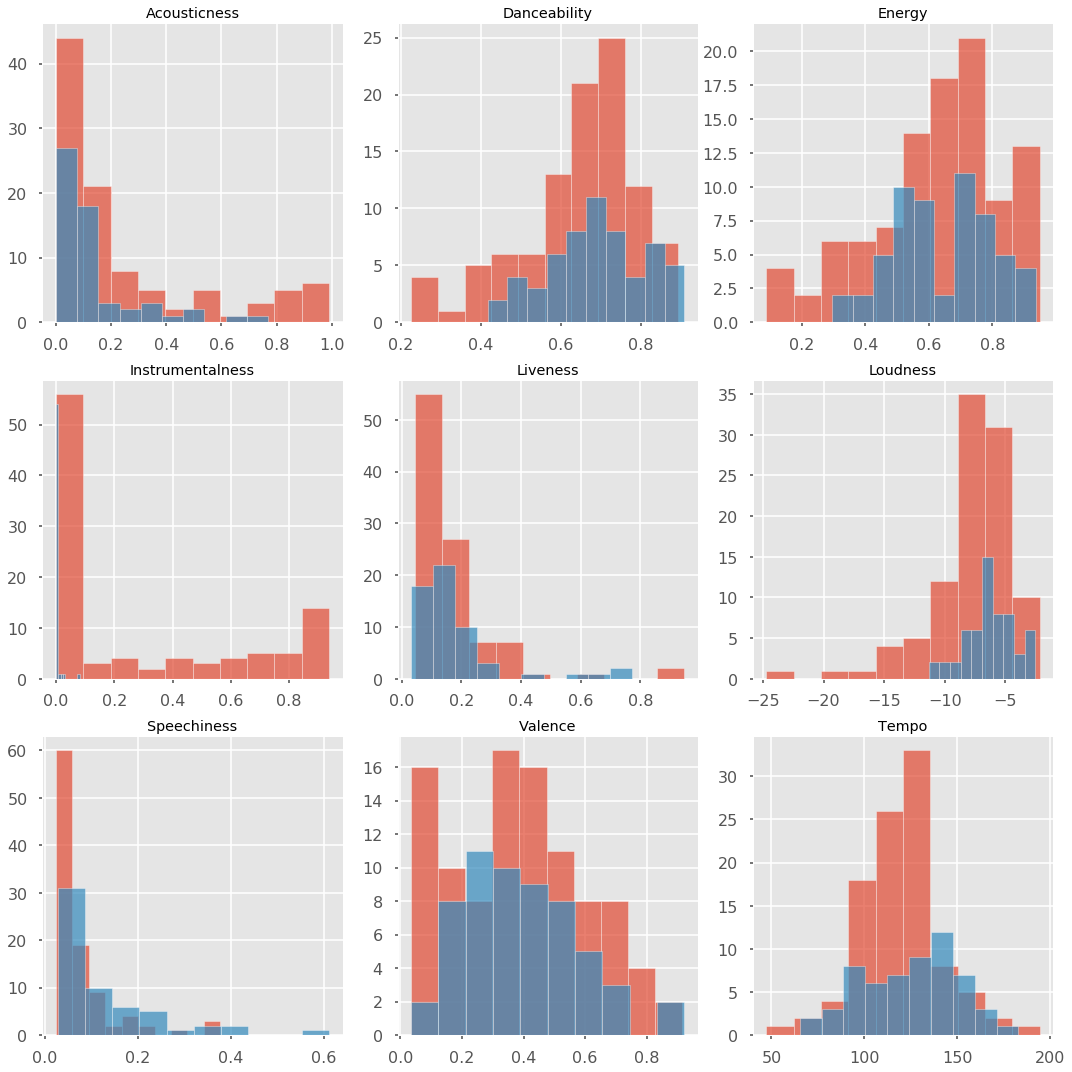

In [8]:
fig1, axs= plt.subplots(figsize=(15,15),nrows=3, ncols=3)
for featured in [feat_1, feat_2]:
    

    axs[0, 0].hist(featured['acousticness'], alpha=0.7, edgecolor='white')
    axs[0, 0].set_title("Acousticness")


    axs[0,1].hist(featured['danceability'], alpha=0.7, edgecolor='white')
    axs[0,1].set_title('Danceability')


    axs[0, 2].hist(featured['energy'], alpha=0.7, edgecolor='white')
    axs[0, 2].set_title('Energy')


    axs[1,0].hist(featured['instrumentalness'], alpha=0.7, edgecolor='white')
    axs[1,0].set_title('Instrumentalness')


    axs[1, 1].hist(featured['liveness'], alpha=0.7, edgecolor='white')
    axs[1, 1].set_title('Liveness')


    axs[1,2].hist(featured['loudness'], alpha=0.7, edgecolor='white')
    axs[1,2].set_title('Loudness')


    axs[2, 0].hist(featured['speechiness'], alpha=0.7, edgecolor='white')
    axs[2, 0].set_title('Speechiness')


    axs[2,1].hist(featured['valence'], alpha=0.7, edgecolor='white')
    axs[2,1].set_title('Valence')

    axs[2,2].hist(featured['tempo'], alpha=0.7, edgecolor='white')
    axs[2,2].set_title('Tempo')


plt.tight_layout()

In [9]:
art_1 = []
art_2 = []
for song in playlist_1:
    art_1.append(pd.DataFrame(song['track']['artists'])['uri'].values)

for song in playlist_2:
    art_2.append(pd.DataFrame(song['track']['artists'])['uri'].values)
    
art_1 = np.unique(np.hstack(art_1))
art_2 = np.unique(np.hstack(art_2))

In [10]:
similar = art_1[np.in1d(art_1, art_2, assume_unique=True)]

In [11]:
df = sp.recommendations(seed_artists=list(similar[:4]),
                   limit=20)

In [12]:
pd.DataFrame(df['tracks']).loc[:,['name','uri']]

,name,uri
0,Feel It In My Bones (feat. Tegan & Sara),spotify:track:6K9GLISAUJtCCno9cuCASa
1,Cigarettes,spotify:track:6rfcKGTIkxmLr9S48tWiGC
2,Reaching,spotify:track:6JrhzRyJ01Xc5OGRiA3mSD
3,High Tide,spotify:track:4jhp98jIMJYeJ9fLJObciG
4,IM GONE,spotify:track:1SYNgyiVRZEBhV0P4YFBk8
5,Show Me,spotify:track:5dpHUPhXfwtEG1yQO1xGXH
6,Tequilawine,spotify:track:7hCr1IIEbIZGG3fR7Gaptc
7,American Dreamlife,spotify:track:5RpkzhgiWhhadVQbTlRXZJ
8,Underwater,spotify:track:5ZvHcR4OSwvEV5IhigbTOT
9,First Breath,spotify:track:75nBbBcSc6unGATTuhB8Ig


In [35]:
df_tuned = sp.recommendations(seed_artists=list(similar[:4]),
                               limit=20,
                               target_acousticness=0.1,
                               target_danceability=0.66,
                               target_energy=0.63,
                               target_instrumentalness=0.1,
                               target_liveness=0.175,
                               target_loudness=-6.9,
                               target_speechiness=0.1,
                               target_valence=0.39,
                               target_tempo=122)
pd.DataFrame(df_tuned['tracks']).loc[:,['name','uri']]

,name,uri
0,Good Intentions,spotify:track:0F0iPeQcWyakStJiBEfnbx
1,Many Words,spotify:track:5AbEYl6Ij4pyF6YGZ3wi38
2,Electrify Me,spotify:track:7MkZtFx58ZUBF4RqwOBQwk
3,Ready For Your Love,spotify:track:1y7agAufBsudgRXuq6Ekqb
4,GOMF,spotify:track:6Ghd3CbFigfo84MHAFrQfT
5,I Don't Exist,spotify:track:7vHZh0zhB2bLoXnnaROJth
6,Till The Sun Comes Up,spotify:track:4Whe2TvDChfqpno4dn0s4B
7,Sunburn,spotify:track:0JITWDB1tVUH2VUXmVtYpL
8,Painkiller,spotify:track:1abFkY2jm6KDFMZ7RD9YJh
9,Never Let You Go,spotify:track:1cZhlHqoerILPQ2lNyhj7o


In [33]:
feat_1['tempo'].mean()

119.96142999999995

In [34]:
feat_2['tempo'].mean()

125.0596896551724

In [22]:
feat_1.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')